# Entrenamiento con datos de entrenamiento
<hr>

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [3]:
X = df.drop(columns=["MorganFP", "SMILES","BBB+/BBB-", "group"])
y = df["BBB+/BBB-"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
pipe = Pipeline([
    ('pca', PCA()),
    ('NB', BernoulliNB())
])

In [10]:
param_grid = {
    'pca__n_components': [314],  # Ejemplo de opciones para el número de componentes en PCA
    'NB__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'NB__binarize': [0.0, 0.5, 1.0, 1.5, 2.0],
    'NB__fit_prior': [True, False]
}

In [11]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True, pca__n_components=314; total time=   3.3s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True, pca__n_components=314; total time=   2.2s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True, pca__n_components=314; total time=   2.4s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True, pca__n_components=314; total time=   2.2s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True, pca__n_components=314; total time=   2.4s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False, pca__n_components=314; total time=   1.9s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False, pca__n_components=314; total time=   1.7s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False, pca__n_components=314; total time=   1.8s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False, pca__n_components=314; total time=   1.6

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('NB', BernoulliNB())]),
             param_grid={'NB__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'NB__binarize': [0.0, 0.5, 1.0, 1.5, 2.0],
                         'NB__fit_prior': [True, False],
                         'pca__n_components': [314]},
             scoring='accuracy', verbose=2)

In [13]:
grid_search.best_params_

{'NB__alpha': 5.0,
 'NB__binarize': 1.0,
 'NB__fit_prior': True,
 'pca__n_components': 314}

In [14]:
grid_search.best_score_

0.7867093674939952

# Entrenamiento con los datos de prueba
<hr>

In [15]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('svc', BernoulliNB(alpha=5.0, binarize=1.0, fit_prior=True))
])

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('svc', BernoulliNB(alpha=5.0, binarize=1.0))])

# Resultados del modelo
<hr>

In [17]:
y_predicha = pipe.predict(X_test)

In [18]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.777
Recall 0.777
precision 0.789
f1 0.758


In [19]:
y_entrenamiento = pipe.predict(X_train)

In [20]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.787
Recall 0.787
precision 1.0
f1 0.77


# Confusion Matrix
<hr>

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

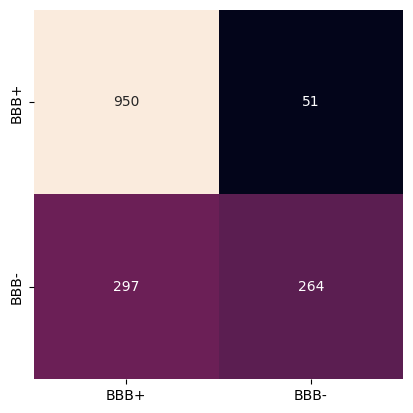

In [23]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [25]:
import joblib

In [26]:
joblib.dump(pipe, '../Guardado de modelos/modelo_NB.joblib')

['../Guardado de modelos/modelo_NB.joblib']